**Apache Parquet**, or just Parquet, is an open-source, [column-oriented file format](https://www.linkedin.com/pulse/perfect-file-format-unveiled-parquet-vs-csv-shailendra-prajapati/) that makes it faster to retrieve data and uses less memory space for tabular data, than say csv files. 

It is very popular for big data repositories. 

The geospatial version of parquet for storing vector data is the **GeoParquet**. 

This format comes from the necessity to have an efficient and standardized format to store big data efficiently. It was first introduced in December 2022. 

This tutorial will be focused on **GeoParquet**

## First do a catalog search
import all necessary libraries. 

In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt 

import pystac_client 
import planetary_computer

import contextily as ctx # adding basemaps

We use the 2020 US Census collection id `us-census` to look for the data in the MPC catalog. 

This collection has each tabular file as an item: 

In [3]:
# open MPC catalog 
catalog = pystac_client.Client.open("https://planetarycomputer.microsoft.com/api/stac/v1", modifier = planetary_computer.sign_inplace,)

#search for census collection 
search = catalog.search(collections=['us-census'])

#retrieve items 
items = {item.id : item for item in search.items()}
item = items ['2020-cb_2020_us_county_500k']

asset = item.assets['data']

Open!

In [6]:

counties = gpd.read_parquet(asset.href, 
                            storage_options = asset.extra_fields['table:storage_options'])

Double check the type of counties object

In [7]:
type(counties)

geopandas.geodataframe.GeoDataFrame

### Contextily 

this is a python library to add basemaps. 

Retrieves tile maps from the internet and makes it possible toplot the alongside our vector data. 

** Example** 

We want tto plot the Santa Barbara county polygon together with a basemap. 


In [8]:
sb = counties[counties.NAME == "Santa Barbara"]
sb

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,NAMELSAD,STUSPS,STATE_NAME,LSAD,ALAND,AWATER,geometry
1222,06,083,00277306,0500000US06083,06083,Santa Barbara,Santa Barbara County,CA,California,06,7080860393,2729213352,"MULTIPOLYGON (((-119.04704 33.48382, -119.0384..."


<Axes: >

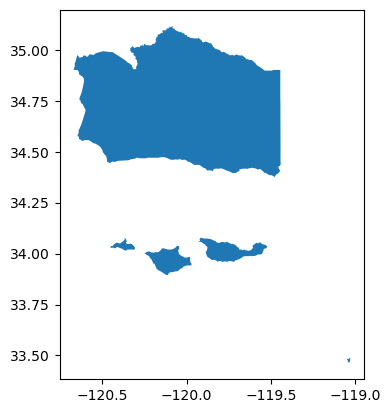

In [9]:
sb.plot() 

Although contextily’s tiles can be reprojected to match the CRS of the vector data, it can be easier to reproject your data to EPSG 3857 instead. The CRS EPSG 3857 (Spherical Mercator / Web Mercator) is a projected coordinate system used for rendering maps online, including Google Maps and OpenStreetMap among others.

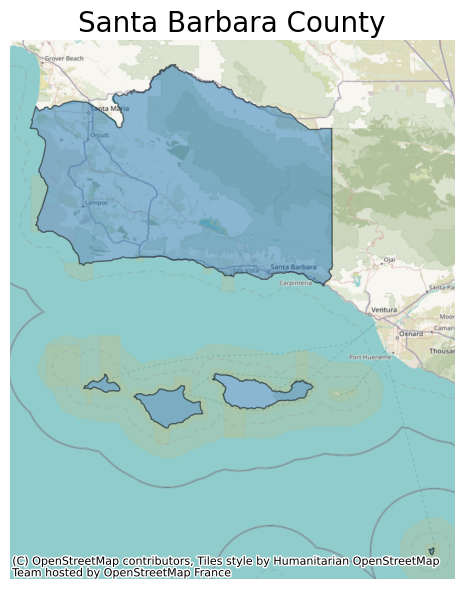

In [10]:
# create axis with plot
ax = (sb.to_crs(epsg=3857)
      .plot(figsize=(7, 7), alpha=0.5, edgecolor="k")
      )

# add basemap from contextily
ctx.add_basemap(ax)

# update axes
ax.set_title("Santa Barbara County", fontdict={"fontsize": "20"})
ax.set_axis_off()

By default, contextily uses the OpenStreetMap HOT style. We can change basemaps by updating the source parameter in the add_basemap() function. For example:

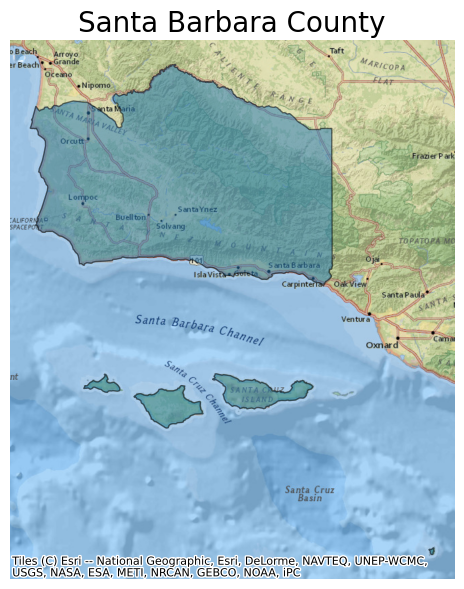

In [11]:
# create axis with plot
ax = (sb.to_crs(epsg=3857)
      .plot(figsize=(7, 7), alpha=0.5, edgecolor="k")
      )

# add NatGeo basemap from contextily
ctx.add_basemap(ax, source=ctx.providers.Esri.NatGeoWorldMap)

# update axes
ax.set_title("Santa Barbara County", fontdict={"fontsize": "20"})
ax.set_axis_off()

In [12]:
ctx.providers

{'OpenStreetMap': {'Mapnik': {'url': 'https://tile.openstreetmap.org/{z}/{x}/{y}.png',
   'max_zoom': 19,
   'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) OpenStreetMap contributors',
   'name': 'OpenStreetMap.Mapnik'},
  'DE': {'url': 'https://tile.openstreetmap.de/{z}/{x}/{y}.png',
   'max_zoom': 18,
   'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) OpenStreetMap contributors',
   'name': 'OpenStreetMap.DE'},
  'CH': {'url': 'https://tile.osm.ch/switzerland/{z}/{x}/{y}.png',
   'max_zoom': 18,
   'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) OpenStreetMap contributors',
   'bounds': [[45, 5], [48, 11]],
   'name': 'OpenStreetMap.CH'},
  'France': {'url': 'https://{s}.tile.openstreetmap.fr/osmfr/{z}/{x}/{y}.png',
   'max_zoom': 20,
   'html_attribution': '&copy; OpenStreetMap France | &copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) OpenStreetMap France | (C) OpenStreetMap contributors',
   'name': 'OpenStreetMap.France'},
  'HOT': {'url': 'https://{s}.tile.openstreetmap.fr/hot/{z}/{x}/{y}.png',
   'max_zoom': 19,
   'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors, Tiles style by <a href="https://www.hotosm.org/" target="_blank">Humanitarian OpenStreetMap Team</a> hosted by <a href="https://openstreetmap.fr/" target="_blank">OpenStreetMap France</a>',
   'attribution': '(C) OpenStreetMap contributors, Tiles style by Humanitarian OpenStreetMap Team hosted by OpenStreetMap France',
   'name': 'OpenStreetMap.HOT'},
  'BZH': {'url': 'https://tile.openstreetmap.bzh/br/{z}/{x}/{y}.png',
   'max_zoom': 19,
   'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors, Tiles courtesy of <a href="http://www.openstreetmap.bzh/" target="_blank">Breton OpenStreetMap Team</a>',
   'attribution': '(C) OpenStreetMap contributors, Tiles courtesy of Breton OpenStreetMap Team',
   'bounds': [[46.2, -5.5], [50, 0.7]],
   'name': 'OpenStreetMap.BZH'},
  'BlackAndWhite': {'url': 'http://{s}.tiles.wmflabs.org/bw-mapnik/{z}/{x}/{y}.png',
   'max_zoom': 18,
   'attribution': '(C) OpenStreetMap contributors',
   'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'name': 'OpenStreetMap.BlackAndWhite'}},
 'MapTilesAPI': {'OSMEnglish': {'url': 'https://maptiles.p.rapidapi.com/{variant}/{z}/{x}/{y}.png?rapidapi-key={apikey}',
   'html_attribution': '&copy; <a href="http://www.maptilesapi.com/">MapTiles API</a>, &copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) MapTiles API, (C) OpenStreetMap contributors',
   'variant': 'en/map/v1',
   'apikey': '<insert your api key here>',
   'max_zoom': 19,
   'name': 'MapTilesAPI.OSMEnglish'},
  'OSMFrancais': {'url': 'https://maptiles.p.rapidapi.com/{variant}/{z}/{x}/{y}.png?rapidapi-key={apikey}',
   'html_attribution': '&copy; <a href="http://www.maptilesapi.com/">MapTiles API</a>, &copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) MapTiles API, (C) OpenStreetMap contributors',
   'variant': 'fr/map/v1',
   'apikey': '<insert your api key here>',
   'max_zoom': 19,
   'name': 'MapTilesAPI.OSMFrancais'},
  'OSMEspagnol': {'url': 'https://maptiles.p.rapidapi.com/{variant}/{z}/{x}/{y}.png?rapidapi-key={apikey}',
   'html_attribution': '&copy; <a href="http://www.maptilesapi.com/">MapTiles API</a>, &copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) MapTiles API, (C) OpenStreetMap contributors',
   'variant': 'es/map/v1',
   'apikey': '<insert 